In [8]:
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = [12, 8]

In [9]:
corr_columns = [
    'revenue_in_millions',
    'profits_in_millions',
    'return_on_assets',
    'n_employees',
    'age_in_years',
    'csr_index',
    'pp_n_sentence',
    'pp_number_of_words',
    'pp_number_of_unique_words',
    'pp_existence_of_a_transparency_report',
    'pp_contact_option',
    'dummy_pp_legislation_complied_with_standard',
    'dummy_pp_legislation_complied_with_ccpa',
    'dummy_pp_legislation_complied_with_gdpr',
    'pp_third_party_sharing',
    'pp_existence_of_a_data_protection_officer',
    'pp_iso_type',
    'pp_ambiquity_score',
    'pp_gunning_fog_index',
    'n_data_breaches',
    'overall_employer_rating',
    'reputation_score_2020',
    'reputation_score_2019',
    'reputation_score_growth',
]

In [10]:
df_clean = pd.read_csv('../data/modelinput/information_governance_clean_dataset.csv')

In [11]:
sector_firm_count = df_clean.groupby(['sector'])[['firm']].count()

In [12]:
sector_firm_count.sort_values('firm', ascending=False)

,firm
sector,
Health Care,22
Financials,19
Technology,18
Retailing,11
Energy,9
Industrials,6
Transportation,6
Business Services,5
Household Products,4


<AxesSubplot:>

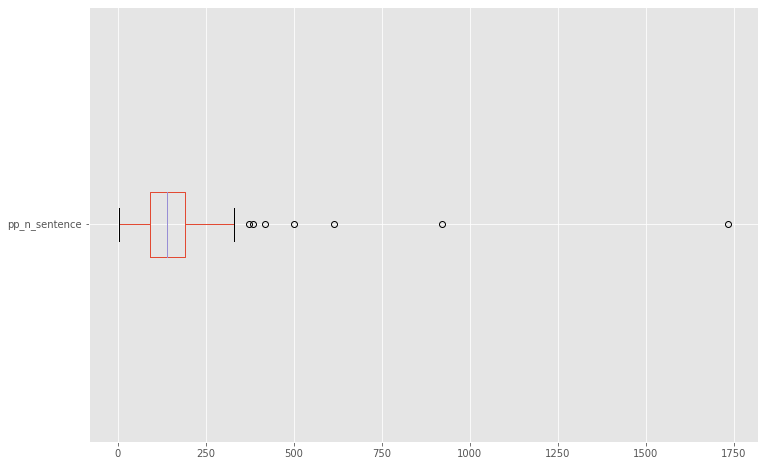

In [13]:
# df4.loc[lambda x: x['pp_n_sentence']<1000][['pp_n_sentence']].boxplot()
df_clean[['pp_n_sentence']].boxplot(vert=False)

In [15]:
for c in corr_columns:
    if len(df_clean[c].unique()) > 2:
        mean = round(df_clean[c].mean(), 2)
        std = round(df_clean[c].std(), 2)
        kurtosis = round(stats.kurtosis(df_clean[c]), 2)
        skew = round(stats.skew(df_clean[c]), 2)
        p_normal_test = round(stats.normaltest(df_clean[c])[1], 3)
        if p_normal_test <= 0.001:
            sig = '***'
        elif p_normal_test <= 0.01:
            sig = '**'
        elif p_normal_test <= 0.05:
            sig = '*'
        else:
            sig = ''
        print(f'{c}: mean = {mean}; std = {std}; kurtosis = {kurtosis}; skew = {skew}; p value normal test = {p_normal_test}{sig}')

revenue_in_millions: mean = 60879.67; std = 81263.2; kurtosis = 12.76; skew = 3.16; p value normal test = 0.0***
profits_in_millions: mean = 6792.71; std = 9948.75; kurtosis = 13.23; skew = 3.34; p value normal test = 0.0***
return_on_assets: mean = 0.05; std = 0.05; kurtosis = 0.94; skew = 0.1; p value normal test = 0.16
n_employees: mean = 118435.62; std = 244889.15; kurtosis = 50.01; skew = 6.58; p value normal test = 0.0***
age_in_years: mean = 49.31; std = 36.93; kurtosis = 0.98; skew = 1.22; p value normal test = 0.0***
csr_index: mean = 0.04; std = 0.03; kurtosis = 0.76; skew = 0.6; p value normal test = 0.012*
pp_n_sentence: mean = 173.69; std = 194.88; kurtosis = 38.92; skew = 5.59; p value normal test = 0.0***
pp_number_of_words: mean = 4424.67; std = 4278.19; kurtosis = 32.17; skew = 4.83; p value normal test = 0.0***
pp_number_of_unique_words: mean = 905.91; std = 474.75; kurtosis = 6.36; skew = 2.09; p value normal test = 0.0***
pp_ambiquity_score: mean = 0.03; std = 0.01;

In [16]:
for c in corr_columns:
    if len(df_clean[c].unique()) == 2:
        print(df_clean.groupby(c)['firm'].count())

pp_existence_of_a_transparency_report
0.0    95
1.0    11
Name: firm, dtype: int64
pp_contact_option
0.0      5
1.0    101
Name: firm, dtype: int64
dummy_pp_legislation_complied_with_standard
0.0      5
1.0    101
Name: firm, dtype: int64
dummy_pp_legislation_complied_with_ccpa
0.0    104
1.0      2
Name: firm, dtype: int64
dummy_pp_legislation_complied_with_gdpr
0.0    103
1.0      3
Name: firm, dtype: int64
pp_third_party_sharing
0.0     8
1.0    98
Name: firm, dtype: int64
pp_existence_of_a_data_protection_officer
0.0    13
1.0    93
Name: firm, dtype: int64
pp_iso_type
0.0    70
1.0    36
Name: firm, dtype: int64


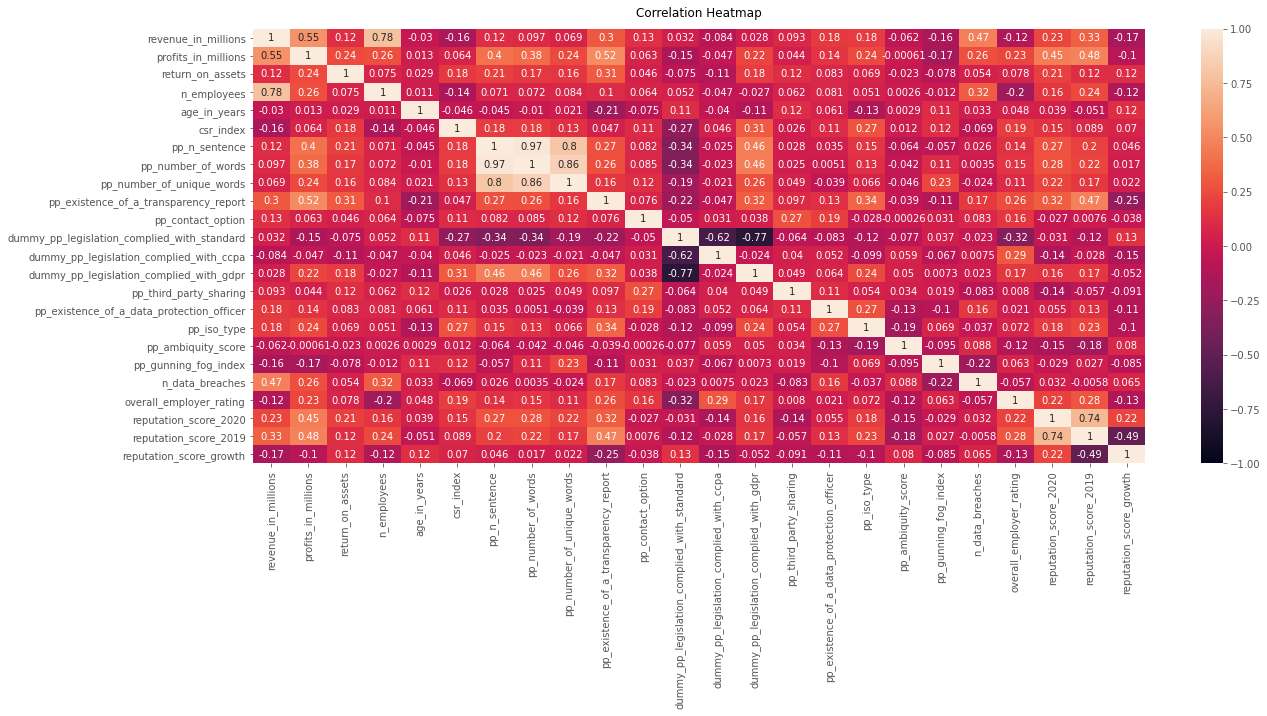

In [17]:
plt.rcParams["figure.figsize"] = [20, 8]
heatmap = sns.heatmap(df_clean[corr_columns].corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [18]:
for c in corr_columns:
    result = stats.pearsonr(df_clean[c], df_clean['reputation_score_2020'])
    if result[1] <= 0.001:
        sig = '***'
    elif result[1] <= 0.01:
        sig = '**'
    elif result[1] <= 0.05:
        sig = '*'
    else:
        sig = ''
    print(f'{c} --> reputation_score_2020 => pearsonr coefficient: {round(result[0], 3)}{sig}; p = {round(result[1], 3)}')

revenue_in_millions --> reputation_score_2020 => pearsonr coefficient: 0.229*; p = 0.018
profits_in_millions --> reputation_score_2020 => pearsonr coefficient: 0.455***; p = 0.0
return_on_assets --> reputation_score_2020 => pearsonr coefficient: 0.21*; p = 0.031
n_employees --> reputation_score_2020 => pearsonr coefficient: 0.162; p = 0.096
age_in_years --> reputation_score_2020 => pearsonr coefficient: 0.039; p = 0.689
csr_index --> reputation_score_2020 => pearsonr coefficient: 0.146; p = 0.134
pp_n_sentence --> reputation_score_2020 => pearsonr coefficient: 0.274**; p = 0.004
pp_number_of_words --> reputation_score_2020 => pearsonr coefficient: 0.276**; p = 0.004
pp_number_of_unique_words --> reputation_score_2020 => pearsonr coefficient: 0.22*; p = 0.024
pp_existence_of_a_transparency_report --> reputation_score_2020 => pearsonr coefficient: 0.322***; p = 0.001
pp_contact_option --> reputation_score_2020 => pearsonr coefficient: -0.027; p = 0.781
dummy_pp_legislation_complied_with_